<a href="https://colab.research.google.com/github/DivineAlways/1api-hub/blob/main/Ollama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lesson Plan: Running Ollama in Google Colab - A Beginner's Guide: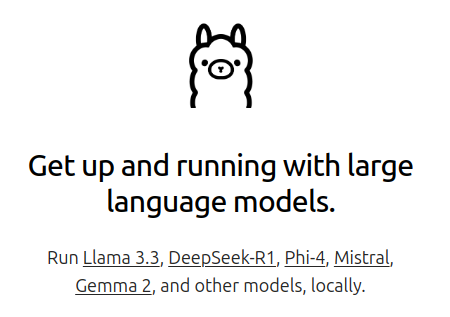**

Target Audience: Individuals with little to no prior experience with Google Colab, command-line interfaces, or large language models.

Learning Objectives:

Understand the basic concept of a language model server like Ollama.

Learn how to install and run Ollama within a Google Colab environment.

Interact with an Ollama-hosted language model using basic text prompts.

Explore different models available through Ollama.

Recognize potential use cases for running local language models.

Materials:

A Google account (required to access Google Colab).

A web browser (Chrome, Firefox, Safari, etc.).

This Colab notebook (pre-populated with the code and explanations below).

# Introduction

Welcome and Overview:

"Welcome to this workshop! We're going to learn how to use a cool tool called Ollama inside of Google Colab. Don't worry if you've never heard of either of those things before. We'll explain everything."

"Think of Ollama as a way to have a powerful computer program (a language model) running right here in Colab. This program can answer your questions, write stories, and more!"

"Colab is like a magical coding playground in your web browser."

What is a Language Model?

"A language model is like a really smart robot that has read tons of books and articles. It can understand and generate human-like text."

Why Run Locally?

"Why not just use something like ChatGPT? Sometimes you want your data to stay private, or you might want to use models that aren't available elsewhere. Running Ollama lets you do that."

"And it's fun to experiment!"

# **Setting up Colab and Ollama**

Opening a New Colab Notebook:

"First, make sure you're logged into your Google account. Then, go to colab.research.google.com and click 'New notebook' (usually in the bottom right). This will open a blank Colab page."

Connecting to a Runtime:

"Colab needs a computer to run your code. Click the 'Connect' button at the top right. It will take a few seconds to connect to a 'runtime'."

Installing Ollama:

"Now, we'll use special commands to install Ollama. These commands are like telling Colab what software we need."

Code Block 1 (Installation):

In [ ]:
!curl -fsSL https://ollama.ai/install.sh | sh

  **Explanation:**
    *   `!`:  This tells Colab to run the command as if you were typing it in a terminal.
    *   `curl`:  A command-line tool for downloading files from the internet.
    *   `https://ollama.ai/install.sh`: This is the address of the Ollama installation script.
    *   `| sh`:  This takes the downloaded script and runs it (installs Ollama).
*   **Instruction:** Click the 'play' button to the left of the cell, or press Shift+Enter.  This will start the installation.  You'll see a lot of text scrolling by – that's normal!"

Starting the Ollama Server:

"Once the installation is complete, we need to start the Ollama server. This makes the language model ready to use."

Code Block 2 (Running Ollama):

In [ ]:
import subprocess
subprocess.Popen(['ollama', 'serve'])
print("Ollama server started in the background.")

*   **Explanation:**
    *   `import subprocess`: Imports a Python module that lets you run commands.
    *   `subprocess.Popen(['ollama', 'serve'])`:  This command starts the Ollama server in the background (so it doesn't block the rest of your code).  `ollama serve` is the command that tells Ollama to start.
    *   `print("Ollama server started in the background.")`:  This just tells you that the server is running.


Downloading a Model:

"Ollama needs a specific language model to run. Let's download one called 'llama2'."

Code Block 3 (Downloading Llama2):

In [ ]:
!ollama pull llama2

* **Explanation:**
    * `!ollama pull llama2:7b`: This command tells ollama to download the llama2 language model with the 7 billion parameter version.
*   **Instruction:** "Copy and paste the code block above into *another* Colab cell.  Click the 'play' button to run it.  You'll see a progress bar as the model downloads.  This might take a few minutes depending on your internet connection."

# Interacting with the Language **Model**

Sending a Simple Prompt:

"Now for the fun part! Let's ask the language model a question."

Code Block 4 (Sending a Prompt):

In [ ]:
import requests
import json

def get_completion(prompt):
    # Define the API endpoint URL
    url = 'http://localhost:11434/api/generate'

    # Set the headers for the POST request
    headers = {
        'Content-Type': 'application/json',
    }

    # Define the data payload for the POST request
    data = {
        "prompt": prompt,
        "model": "llama2",
        "stream": False  # Set to False to receive the full response at once
    }

    # Make the POST request to the API
    response = requests.post(url, headers=headers, data=json.dumps(data))

    # Check if the request was successful
    if response.status_code == 200:
        # Return the response text if successful
        return response.json()['response']
    else:
        # Return an error message if the request fails
        return f"Error: {response.status_code} - {response.text}"

# Define the question prompt
question = "What is the capital of France?"

# Get the response from the API
answer = get_completion(question)

# Print the response
print(answer)

*   **Explanation:**
    *   `import requests`: Imports a Python library for making web requests.
    *   `import json`: Imports a Python library for working with JSON data (a common format for sending data over the internet).
    *   `url = 'http://localhost:11434/api/generate'`:  This is the address where the Ollama server is listening for requests.
    *   `headers`:  This tells the server what kind of data we're sending.
    *   `data`:  This is the actual question we're sending to the model.  `"prompt"` is the question itself, and `"model"` specifies which language model to use.  `"stream": False` means we want the whole answer at once.
    *   `response = requests.post(...)`:  This sends the question to the Ollama server.
    *   `response.json()['response']`:  This extracts the answer from the server's response.
*   **Instruction:** "Click the 'play' button. You should see the answer to the question printed below the cell."

Easier Version

In [ ]:
!ollama run llama2 "what is the tallest building in Atlanta ga"?

Experimenting with Different Prompts:

"Try changing the question variable to ask the model different things! Be creative."

"Examples: 'Write a short poem about cats.', 'Explain the theory of relativity in simple terms.', 'What are some good recipes using bananas?'"

Exploring Different Models (Optional, if time allows):

"Ollama has other models you can download and try. For example, !ollama pull mistralai/Mistral-7B-Instruct-v0.1 will download the Mistral model (a good alternative to Llama2). Remember to change the "model" value in the code to match the model you downloaded."

# Troubleshooting and Common Issues

"Colab is stuck or not responding": Try clicking "Runtime" -> "Restart runtime".

"Ollama command not found": Make sure you ran the installation script successfully. Sometimes restarting the runtime can help.

"Error messages in the output": Carefully read the error message. It might give you a clue about what went wrong. (Examples: model not found, server not running). Google the error message!

Resource Limits: Colab provides limited resources (CPU, memory). Very large models might not run well, or at all.

# Conclusion

Recap: "Today, you learned how to install and run Ollama in Google Colab, download language models, and ask them questions. You've taken your first steps into the world of local language model experimentation!"

Next Steps:

"Explore other models available on Ollama (check the Ollama website for a list)."

"Learn more about prompt engineering (how to craft effective questions)."

"Think about how you could use local language models in your own projects."

Q&A: "Any questions?"

Enhancements and Interactive Elements:

Quizzes: Embed short quizzes throughout the lesson to check for understanding. (Example: "What command do you use to install Ollama in Colab?"). Use Google Forms or a similar tool to create the quizzes and link them in the notebook.

Interactive Input Fields: Use Colab's form fields to allow users to enter their prompts directly into the notebook without editing the code. This makes the interaction more user-friendly.